In [790]:
# import libraries

import pandas as pd
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt

import plotly.express as px
#import bokeh as bk
#import bokeh.plotting as bp


import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [791]:
# 1. BRFSS 2015 (from Kaggle)
df_brfss = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df_brfss.columns = df_brfss.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-','_')

In [792]:
df_brfss.head()

,diabetes_binary,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [793]:
df_brfss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diabetes_binary       70692 non-null  float64
 1   highbp                70692 non-null  float64
 2   highchol              70692 non-null  float64
 3   cholcheck             70692 non-null  float64
 4   bmi                   70692 non-null  float64
 5   smoker                70692 non-null  float64
 6   stroke                70692 non-null  float64
 7   heartdiseaseorattack  70692 non-null  float64
 8   physactivity          70692 non-null  float64
 9   fruits                70692 non-null  float64
 10  veggies               70692 non-null  float64
 11  hvyalcoholconsump     70692 non-null  float64
 12  anyhealthcare         70692 non-null  float64
 13  nodocbccost           70692 non-null  float64
 14  genhlth               70692 non-null  float64
 15  menthlth           

In [794]:
# distribution of classes in dataset
print(df_brfss['diabetes_binary'].value_counts())
print(df_brfss['diabetes_binary'].value_counts(normalize=True))

diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64
diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


In [795]:
# The needed columns for the first hypothesis
hypo4_cols = ["physactivity","genhlth","menthlth","physhlth","diffwalk","diabetes_binary"]
df_hypo4 = df_brfss[hypo4_cols]

df_hypo4.head(5)

,physactivity,genhlth,menthlth,physhlth,diffwalk,diabetes_binary
0,1.0,3.0,5.0,30.0,0.0,0.0
1,0.0,3.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,10.0,0.0,0.0
3,1.0,3.0,0.0,3.0,0.0,0.0
4,1.0,2.0,0.0,0.0,0.0,0.0


In [796]:
df_hypo4.dtypes

physactivity       float64
genhlth            float64
menthlth           float64
physhlth           float64
diffwalk           float64
diabetes_binary    float64
dtype: object

In [797]:
df_hypo4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   physactivity     70692 non-null  float64
 1   genhlth          70692 non-null  float64
 2   menthlth         70692 non-null  float64
 3   physhlth         70692 non-null  float64
 4   diffwalk         70692 non-null  float64
 5   diabetes_binary  70692 non-null  float64
dtypes: float64(6)
memory usage: 3.2 MB


# Dont mind this one first

In [798]:
fig = go.Figure(data=[go.Sankey(
    arrangement = "fixed",
    node = dict(
    pad = 20, # Space between nodes
    thickness = 50,
    line = dict(color = "black", width = 1.5),
    label = ["Hypothesis 1", "Hypothesis 2", "Hypothesis 3" ,"Hypothesis 4", "Hypothesis 5", "Decline", "Accept"],
    x = [0.001, -0.001, -0.001, 0.001, 0.001, 0.9, 0.9],  # left/right placement
    y = [0.1, 0.3, 0.5, 0.7, 0.9, 0.1, 0.7],  # vertical positions
    color = ["#c7d2fe"]*5 + ["#f87171", "#86EFAC"]
    ),
    
    link = dict(
    source = [0 , 1, 2, 3 ,4], # indices correspond to labels, eg A1, A2, A1, B1, ...
    target = [5,  6, 5, 6,6],
    value = [5, 5, 5, 5, 5,],
    ##color  = ["rgba(255,100,100,0.4)" if t==5 else "rgba(100,255,100,0.4)" for t in [5,6,5,6,6]] 
))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

# Graph 1

In [799]:
health_map = {1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}
df_hypo4['genhlth_label'] = df_hypo4['genhlth'].map(health_map) # create new column

# Group and calculate means
grouped_df = df_hypo4.groupby('genhlth_label').agg({
    'diabetes_binary': lambda x: (x.mean() * 100),
    'menthlth': 'mean',
    'physhlth': 'mean'
}).reindex(['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])

grouped_df.head()

C:\Users\gizel\AppData\Local\Temp\ipykernel_6496\2469583147.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,diabetes_binary,menthlth,physhlth
genhlth_label,,,
Excellent,13.764791,1.377083,1.030307
Very Good,32.110507,1.844555,1.636021
Good,57.442267,2.843557,3.581124
Fair,73.592423,6.208600,11.360595
Poor,78.822314,11.702824,23.188877


In [800]:
fig = go.Figure() # Create figure

# Diabetes rate (filled area)
fig.add_trace(go.Scatter(
    x=grouped_df.index,
    y=grouped_df['diabetes_binary'],
    name='Diabetes Rate (%)',
    line=dict(color="#FBE35A", width=4),
    fill='tozeroy',
    fillcolor='rgba(251,227,90, 0.4)',
    yaxis='y'
))

# Mental unhealthy days
fig.add_trace(go.Scatter(
    x=grouped_df.index,
    y=grouped_df['menthlth'],
    name='Mental Unhealthy Days',
    line=dict(color="#931A23", width=4),
    fill='tozeroy',
    fillcolor='rgba(147,26,35, 0.4)',
    yaxis='y2'
))

# Physical unhealthy days
fig.add_trace(go.Scatter(
    x=grouped_df.index,
    y=grouped_df['physhlth'],
    name='Physical Unhealthy Days',
    line=dict(color="#C5944B", width=4),
    fill='tozeroy',
    fillcolor='rgba(238,200,163, 0.4)',
    yaxis='y2'
))

# Legends and Hover
fig.update_layout(
    yaxis=dict(title='Diabetes Rate (%)'),
    yaxis2=dict(title='Healthy Days (per month)', overlaying='y', side='right'),
    legend=dict(x=0.5, y=-0.1, xanchor='center', orientation='h'),
    height=500,
    hovermode="closest",
    template="plotly_white"
)

fig.update_traces(
    hovertemplate='%{y:.1f},'
)

fig.show()

# Graph 2

In [801]:
# Group and calculate means
physactivity = df_hypo4.groupby('physactivity')['diabetes_binary'].mean() * 100
physactivity = pd.DataFrame({
    'Response': physactivity.index.map({0: 'No', 1: 'Yes'}),
    'Diabetes Rate (%)': physactivity.values,
})

physactivity.head()


,Response,Diabetes Rate (%)
0,No,62.206450
1,Yes,44.843961


In [802]:
# Group and calculate means for diffwalk
diffwalk_data = df_hypo4.groupby('diffwalk').agg({
    'diabetes_binary': lambda x: x.mean() * 100,
    'diffwalk': 'count'
}).rename(columns={'diffwalk': 'Count', 'diabetes_binary': 'Diabetes Rate (%)'})
diffwalk_data['Response'] = diffwalk_data.index.map({0: 'No Difficulty', 1: 'Difficulty'})

# Group and calculate means for physactivity
physactivity_data = df_hypo4.groupby('physactivity').agg({
    'diabetes_binary': lambda x: x.mean() * 100,
    'physactivity': 'count'
}).rename(columns={'physactivity': 'Count', 'diabetes_binary': 'Diabetes Rate (%)'})
physactivity_data['Response'] = physactivity_data.index.map({0: 'No', 1: 'Yes'})


In [803]:
diffwalk_data.head()
physactivity_data.head()

,Diabetes Rate (%),Count,Response
physactivity,,,
0.0,62.206450,20993,No
1.0,44.843961,49699,Yes


In [804]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Difficulty Walking', 'Physical Activity in the Past Month'))

# Diffwalk bar chart
fig.add_trace(go.Bar(
    x=diffwalk_data['Response'],
    y=diffwalk_data['Diabetes Rate (%)'],
    marker_color="#931A23",
    customdata=diffwalk_data[['Diabetes Rate (%)', 'Count']],
    hovertemplate='%{x} <br> Diabetes Rate: %{customdata[0]:.1f}% <br> Count = %{customdata[1]:,}<extra></extra>',
    showlegend=False,
    unselected=dict(marker=dict(color='#931A23', opacity=0.5))
), row=1, col=1)

# Physactivity bar chart
fig.add_trace(go.Bar(
    x=physactivity_data['Response'],
    y=physactivity_data['Diabetes Rate (%)'],
    marker_color='#931A23',
    customdata=physactivity_data[['Diabetes Rate (%)', 'Count']],
    hovertemplate='%{x} <br> Diabetes Rate: %{customdata[0]:.1f}% <br> Count = %{customdata[1]:,}<extra></extra>',
    showlegend=False,
    unselected=dict(marker=dict(color='#931A23', opacity=0.5))
), row=1, col=2)

# Update layout
fig.update_yaxes(title_text='Diabetes Rate (%)', row=1, col=1)
fig.update_yaxes(title_text='Diabetes Rate (%)', row=1, col=2)

fig.update_layout(
    title_text='Diabetes Rate by Difficulty Walking and Physical Activity',
    height=500,
    hovermode='closest',
        hoverlabel= dict(
        bgcolor="white",
        font_color="black",
        bordercolor="gray"
    ),
    dragmode='select',
    clickmode='event+select'
)

fig.show()

# Graph 3

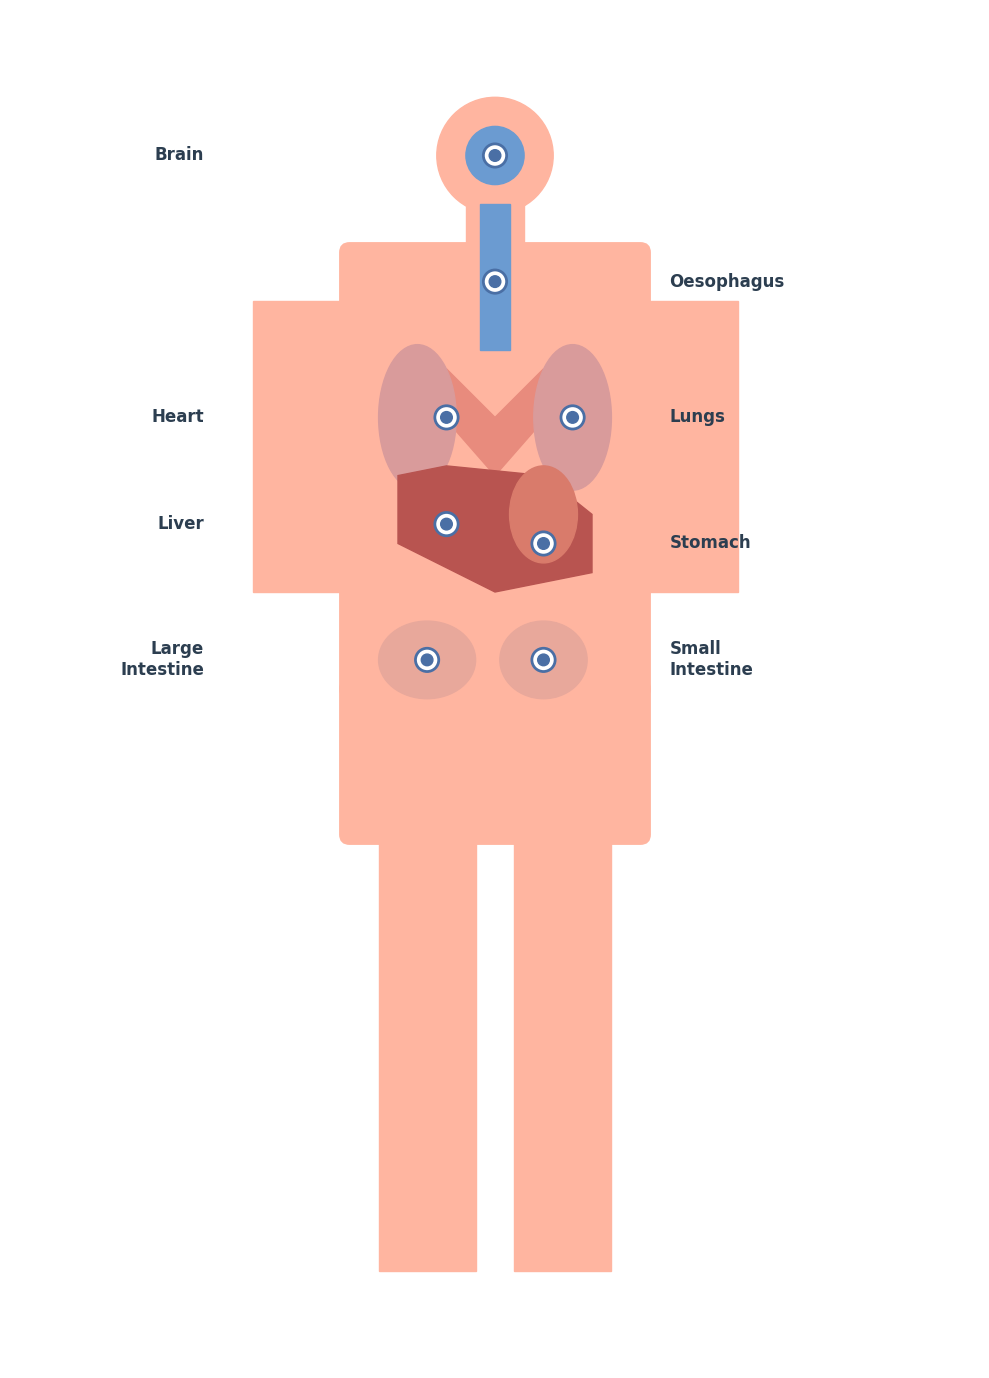

In [805]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Circle, Ellipse, Rectangle, FancyBboxPatch
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(10, 14))
ax.set_xlim(0, 10)
ax.set_ylim(0, 14)
ax.axis('off')
ax.set_aspect('equal')

# Body silhouette (simplified)
body_color = '#FFB5A0'
head = Circle((5, 12.5), 0.6, color=body_color, zorder=1)
ax.add_patch(head)

# Neck
neck = Rectangle((4.7, 11.5), 0.6, 1, color=body_color, zorder=1)
ax.add_patch(neck)

# Torso
torso = FancyBboxPatch((3.5, 7), 3, 4.5, boxstyle="round,pad=0.1", 
                        color=body_color, zorder=1)
ax.add_patch(torso)

# Arms
left_arm = Rectangle((2.5, 8), 1, 3, color=body_color, zorder=1)
right_arm = Rectangle((6.5, 8), 1, 3, color=body_color, zorder=1)
ax.add_patch(left_arm)
ax.add_patch(right_arm)

# Pelvis/hips
pelvis = FancyBboxPatch((3.5, 5.5), 3, 1.5, boxstyle="round,pad=0.1", 
                        color=body_color, zorder=1)
ax.add_patch(pelvis)

# Legs
left_leg = Rectangle((3.8, 1), 1, 4.5, color=body_color, zorder=1)
right_leg = Rectangle((5.2, 1), 1, 4.5, color=body_color, zorder=1)
ax.add_patch(left_leg)
ax.add_patch(right_leg)

# Organs with enhanced colors
# Brain
brain = Circle((5, 12.5), 0.3, color='#6B9BD1', zorder=2)
ax.add_patch(brain)

# Esophagus
esophagus = Rectangle((4.85, 10.5), 0.3, 1.5, color='#6B9BD1', zorder=2)
ax.add_patch(esophagus)

# Heart
heart_pts = np.array([[4.3, 10], [4.5, 10.3], [5, 9.8], [5.5, 10.3], [5.7, 10], [5, 9.2]])
heart = plt.Polygon(heart_pts, color='#E88B7D', zorder=2)
ax.add_patch(heart)

# Lungs
left_lung = Ellipse((4.2, 9.8), 0.8, 1.5, color='#D99B9B', zorder=2)
right_lung = Ellipse((5.8, 9.8), 0.8, 1.5, color='#D99B9B', zorder=2)
ax.add_patch(left_lung)
ax.add_patch(right_lung)

# Liver
liver_pts = np.array([[4, 8.5], [4, 9.2], [4.5, 9.3], [5.5, 9.2], [6, 8.8], [6, 8.2], [5, 8]])
liver = plt.Polygon(liver_pts, color='#B85450', zorder=2)
ax.add_patch(liver)

# Stomach
stomach = Ellipse((5.5, 8.8), 0.7, 1, color='#D97B6B', zorder=2)
ax.add_patch(stomach)

# Large Intestine
large_int = Ellipse((4.3, 7.3), 1, 0.8, color='#E8A89B', zorder=2)
ax.add_patch(large_int)

# Small Intestine
small_int = Ellipse((5.5, 7.3), 0.9, 0.8, color='#E8A89B', zorder=2)
ax.add_patch(small_int)

# Marker dots
markers = [
    (5, 12.5, 'Brain'),
    (5, 11.2, 'Oesophagus'),
    (4.5, 9.8, 'Heart'),
    (5.8, 9.8, 'Lungs'),
    (4.5, 8.7, 'Liver'),
    (5.5, 8.5, 'Stomach'),
    (4.3, 7.3, 'Large\nIntestine'),
    (5.5, 7.3, 'Small\nIntestine')
]

for x, y, label in markers:
    # Draw marker dot
    marker = Circle((x, y), 0.12, color='white', ec='#4A6FA5', linewidth=2, zorder=3)
    ax.add_patch(marker)
    inner = Circle((x, y), 0.06, color='#4A6FA5', zorder=4)
    ax.add_patch(inner)

# Labels
label_positions = [
    (2, 12.5, 'Brain', 'right'),
    (6.8, 11.2, 'Oesophagus', 'left'),
    (2, 9.8, 'Heart', 'right'),
    (6.8, 9.8, 'Lungs', 'left'),
    (2, 8.7, 'Liver', 'right'),
    (6.8, 8.5, 'Stomach', 'left'),
    (2, 7.3, 'Large\nIntestine', 'right'),
    (6.8, 7.3, 'Small\nIntestine', 'left')
]

for x, y, text, align in label_positions:
    ha = 'right' if align == 'right' else 'left'
    ax.text(x, y, text, fontsize=12, ha=ha, va='center', 
            fontweight='600', color='#2C3E50')

plt.tight_layout()
plt.show()

In [808]:
!pip install React

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for React: filename=react-4.3.0-py3-none-any.whl size=4848 sha256=7da67f457f0f42bd7717b1a7190a8965b5cf4b2bd01432cfc2ab45d1d52a947d
  Stored in directory: c:\users\gizel\appdata\local\pip\cache\wheels\e6\b8\bf\a436a9ccdb3f4bc85c8d77d9cda397ed56f383d0f707c4cdfb
  Created wheel for optional-django: filename=optional_django-0.3.0-py3-none-any.whl size=10540 sha256=cbc11b8d2dd223842b1ddf72bbc8df2c27d19fc38413e6a7a9684959671d4321
  Stored in directory: c:\users\gizel\appdata\local\pip\cache\wheels\44\37\87\b8748f7a2137e5da5067b866693911581b825cd38b2d69aefe
Successfully built React optional-django

   ---------------------------------------- 2/2 [React]



  DEPRECATION: Building 'React' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'React'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'optional-django' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'optional-django'. Discussion can be found at https://github.com/pypa/pip/issues/6334
